In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("car_price_prediction.csv")
df.head()

,mon_year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
0,Oct_2006,49805.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14310.0
1,Oct_2006,77313.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14575.0
2,Sept_2006,44214.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14787.0
3,Jul_2006,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,15847.0
4,Mar_2006,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,14575.0


In [3]:
print(df.columns)

Index(['mon_year', 'KM_driven', 'Fuel_Type', 'Horse_Power', 'Color',
       'Transmission', 'Engine', 'Doors', 'Cylinders', 'Gears', 'Sport_Model',
       'selling_price'],
      dtype='object')


In [4]:
df.isnull().sum()

mon_year         0
KM_driven        0
Fuel_Type        0
Horse_Power      0
Color            0
Transmission     0
Engine           0
Doors            0
Cylinders        0
Gears            0
Sport_Model      0
selling_price    0
dtype: int64

In [5]:
datatypes=df.dtypes
print(datatypes)

mon_year          object
KM_driven        float64
Fuel_Type         object
Horse_Power        int64
Color             object
Transmission      object
Engine             int64
Doors              int64
Cylinders          int64
Gears              int64
Sport_Model        int64
selling_price    float64
dtype: object


<Axes: ylabel='proportion'>

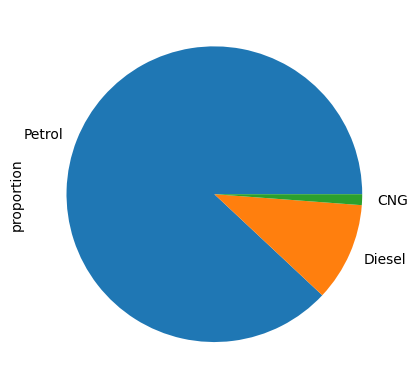

In [6]:
df['Fuel_Type'].value_counts(normalize=True).plot.pie()

<Axes: ylabel='Doors'>

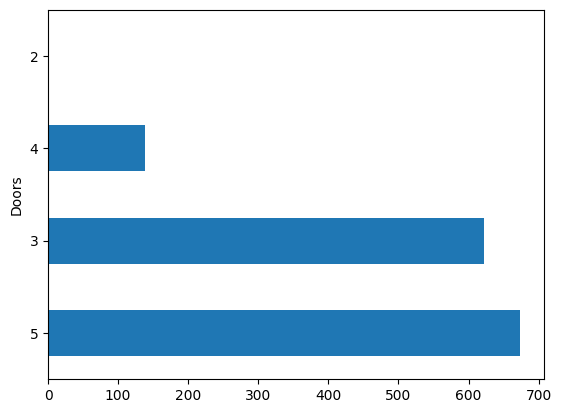

In [7]:
df['Doors'].value_counts().plot.barh()

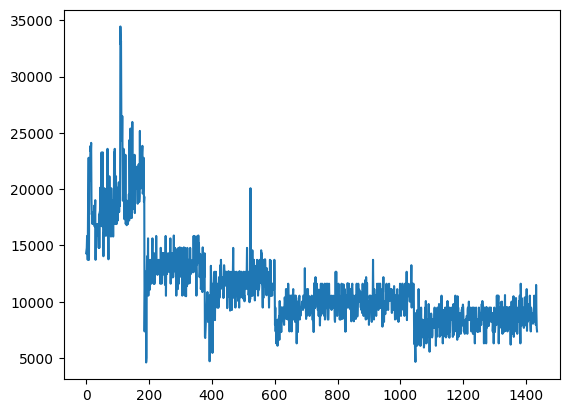

In [8]:
#Line plot for selling price
plt.plot(df.selling_price)
plt.show()

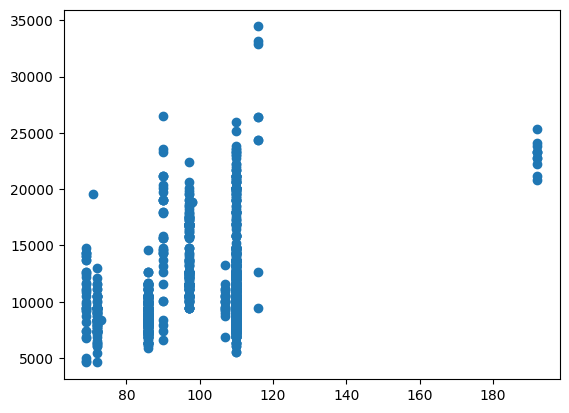

In [9]:
#Scatter plot for selling price and horse power
plt.scatter(df.Horse_Power,df.selling_price)
plt.show()

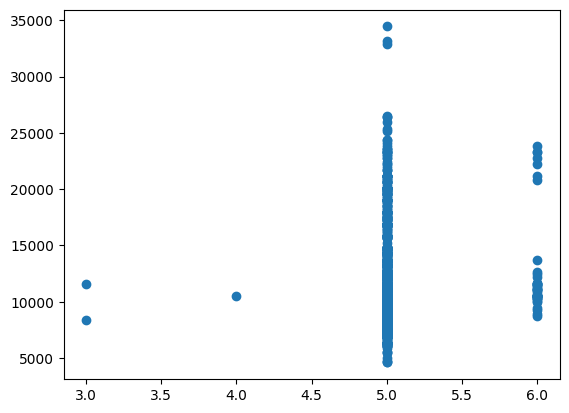

In [10]:
#scatter plot for selling price and gear
plt.scatter(df.Gears,df.selling_price)
plt.show()

<Axes: ylabel='Transmission'>

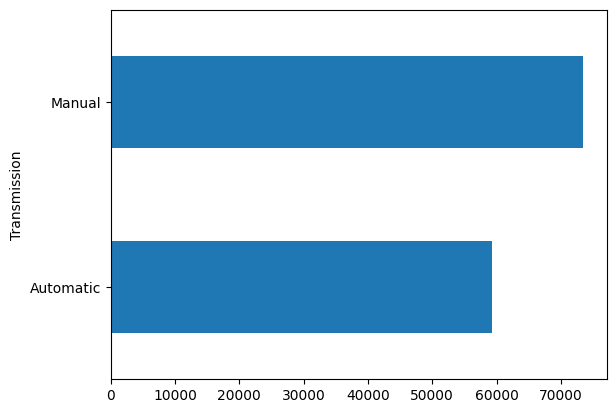

In [11]:
df.groupby("Transmission")["KM_driven"].mean().plot.barh()

Color  Metallic  Non-Metallic
Doors                        
2      5.000000      5.000000
3      5.071795      5.051724
4      4.979798      5.000000
5      5.004175      4.989744


<Axes: xlabel='Color', ylabel='Doors'>

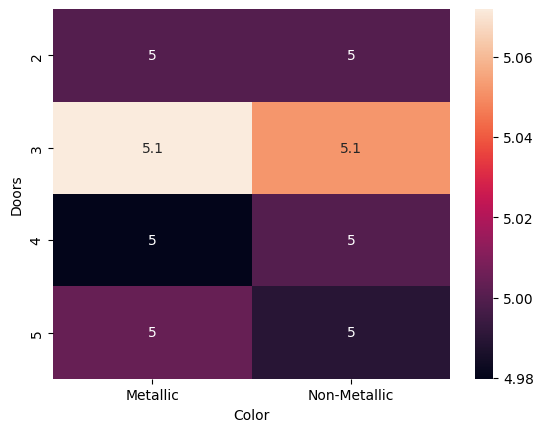

In [12]:
result=pd.pivot_table(data=df,index="Doors",columns='Color',values="Gears")
print(result)
sns.heatmap(result, annot=True)

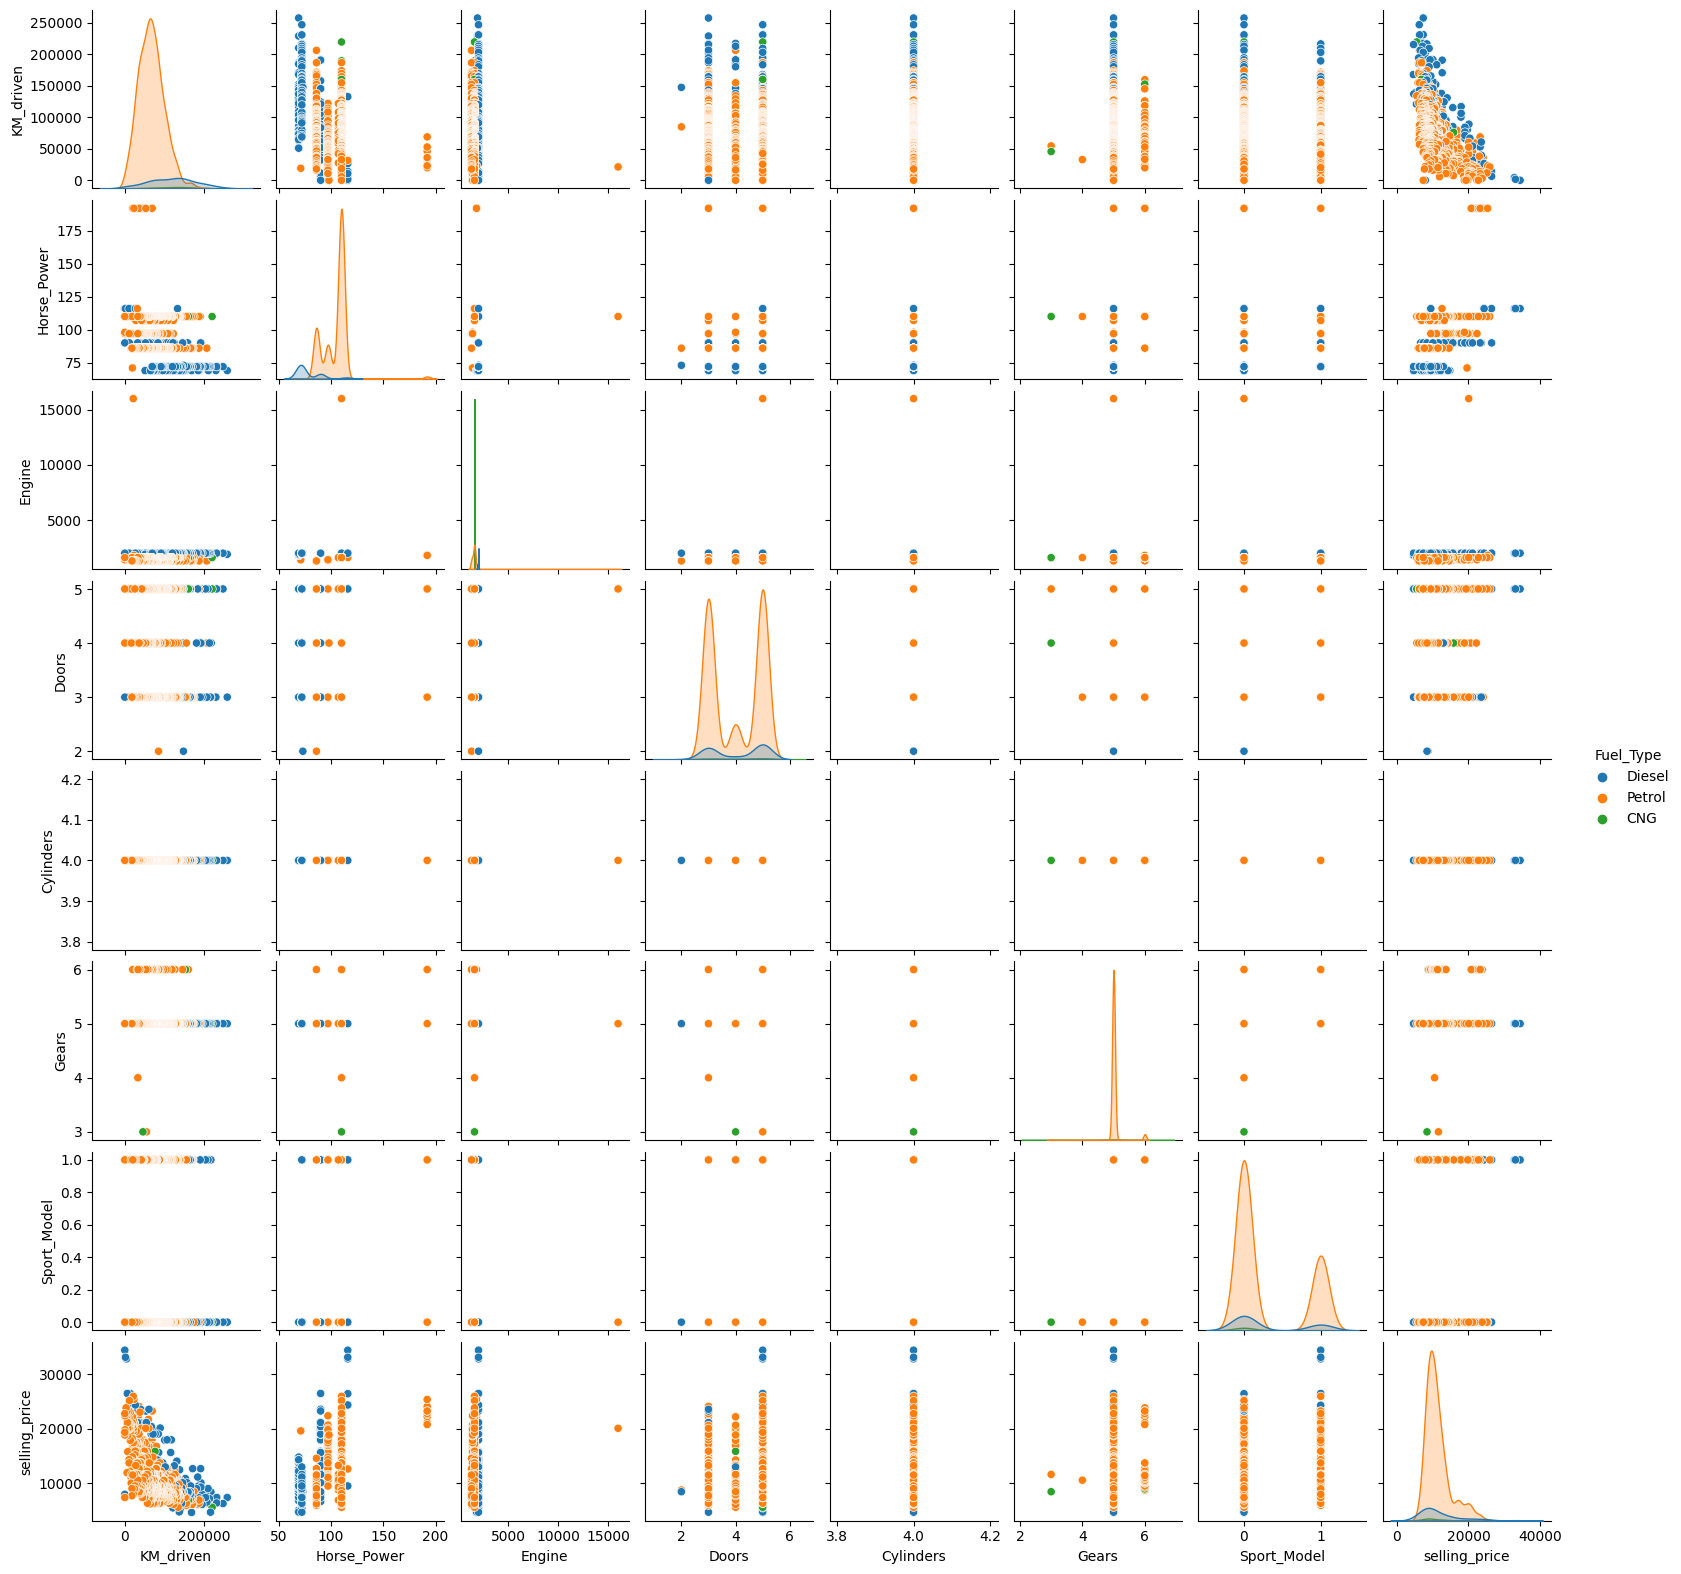

In [13]:
sns.pairplot(df,hue='Fuel_Type',height=2)
plt.show()

In [14]:
df.mon_year.value_counts()

mon_year
Jan_2003    69
Apr_2003    63
Jan_2002    59
Mar_2002    47
Jul_2003    42
            ..
Jul_2008     2
Aug_2008     2
Nov_2007     1
Mar_2007     1
Mar_2008     1
Name: count, Length: 77, dtype: int64

In [15]:
df['month']=df['mon_year'].str.split('_',n=1,expand=True)[0]
df['year']=df['mon_year'].str.split('_',n=1,expand=True)[1]
df.drop('mon_year',axis=1,inplace=True)
df.head()

,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price,month,year
0,49805.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14310.0,Oct,2006
1,77313.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14575.0,Oct,2006
2,44214.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14787.0,Sept,2006
3,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,15847.0,Jul,2006
4,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,14575.0,Mar,2006


In [16]:
dummies = pd.get_dummies(df[['Fuel_Type', 'Color', 'Transmission', 'month', 'year']])
encoded_df = pd.concat([df, dummies], axis=1)
encoded_df.drop(['Fuel_Type', 'Color', 'Transmission', 'month', 'year'], axis=1, inplace=True)
encoded_df.head()


,KM_driven,Horse_Power,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price,Fuel_Type_CNG,Fuel_Type_Diesel,...,month_Nov,month_Oct,month_Sept,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008
0,49805.0,90,2000,3,4,5,0,14310.0,False,True,...,False,True,False,False,False,False,False,True,False,False
1,77313.0,90,2000,3,4,5,0,14575.0,False,True,...,False,True,False,False,False,False,False,True,False,False
2,44214.0,90,2000,3,4,5,0,14787.0,False,True,...,False,False,True,False,False,False,False,True,False,False
3,50880.0,90,2000,3,4,5,0,15847.0,False,True,...,False,False,False,False,False,False,False,True,False,False
4,40810.0,90,2000,3,4,5,0,14575.0,False,True,...,False,False,False,False,False,False,False,True,False,False


In [17]:
y=encoded_df["selling_price"]
x=encoded_df.drop("selling_price",axis=1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
lr.score(x_train,y_train)

0.8893954094764038